In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

In [49]:
# Load your data (replace with your actual file path)
data = pd.read_csv("/content/combined_cleaned_dataset.csv")

In [50]:
data.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,Transcript_length,Resume_length,Job_Description_length,Transcript_Resume_Score,Transcript_JobDescription_Score,Resume_JobDescription_Score,Final_Match_Score
0,uppaup,alice smith,software engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,rejected,unsatisfactory references or background check,here is a comprehensive job description for a ...,3101,2599,3857,0.128843,0.159541,0.267942,0.185442
1,uppaup,hank brown,software engineer,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,selected,growth mindset and adaptability,here is a job description for a software engin...,4965,2634,1066,0.268331,0.190271,0.268425,0.242342
2,uppaup,bob jones,data scientist,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,rejected,inadequate communication or interpersonal skills,here is a comprehensive job description for a ...,2803,3050,3105,0.311734,0.285505,0.466292,0.354511
3,uppaup,bob miller,software engineer,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,selected,strong cultural fit,here is a sample job description for a softwar...,4119,2491,3354,0.226898,0.259491,0.326965,0.271118
4,uppaup,ivy jones,data engineer,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,rejected,lack of relevant skills or experience,here is a sample job description for a data en...,3321,2864,3843,0.361991,0.420489,0.588236,0.456905


In [102]:
# Assuming 'data' is your pandas DataFrame
unique_decisions = data['decision'].unique()
print("Unique values in 'decision' column:", unique_decisions)

Unique values in 'decision' column: ['rejected' 'selected' 'reject' 'select']


In [103]:
# Assuming 'data' is your pandas DataFrame
data['decision'] = data['decision'].replace({'select': 'selected', 'reject': 'rejected'})

In [104]:
# Assuming 'decision' is the target variable
X = data[['Transcript_length', 'Resume_length', 'Job_Description_length']]
y = data['decision']

In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Split the data

In [106]:
# Scale the features (important for SHAP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
# Train a RandomForest model
model = RandomForestClassifier()  # Replace with your desired hyperparameters
model.fit(X_scaled, y)

RandomForestClassifier()

In [108]:
# Initialize and compute SHAP values
explainer = shap.Explainer(model.predict_proba, X_scaled)
shap_values = explainer(X_scaled)

ExactExplainer explainer: 3175it [01:54, 24.86it/s]                          


In [109]:
# Assuming 'decision' is the target variable and has 2 classes ('selected' (1) and 'rejected'(0))
# To focus on 'selected' (1), set class_index to 1
# To focus on 'rejected' (0), set class_index to 0

class_index = 1  # For 'selected' class

# Initialize and compute SHAP values for the specific class
# model.predict_proba returns probabilities for all classes,
# we select the column corresponding to the class_index
explainer = shap.Explainer(lambda X: model.predict_proba(X)[:, class_index], X_scaled)
shap_values = explainer(X_scaled)


ExactExplainer explainer: 3175it [01:55, 24.90it/s]                          


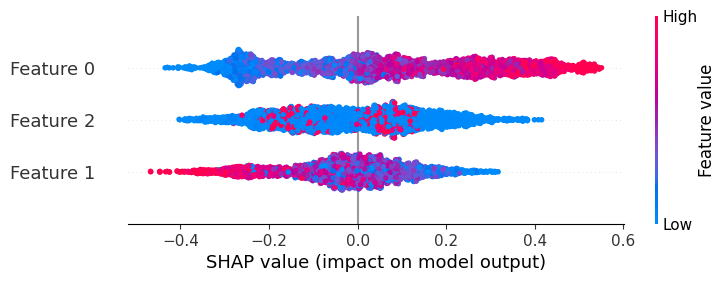

In [110]:
# Now you can create the beeswarm plot
shap.plots.beeswarm(shap_values)

In [112]:
# Assuming 'decision' is the target variable and has 2 classes ('selected' (1) and 'rejected'(0))
# To focus on 'selected' (1), set class_index to 1
# To focus on 'rejected' (0), set class_index to 0

class_index = 0  # For 'rejected' class

# Initialize and compute SHAP values for the specific class
# model.predict_proba returns probabilities for all classes,
# we select the column corresponding to the class_index
explainer = shap.Explainer(lambda X: model.predict_proba(X)[:, class_index], X_scaled)
shap_values = explainer(X_scaled)


ExactExplainer explainer: 3175it [01:55, 25.01it/s]                          


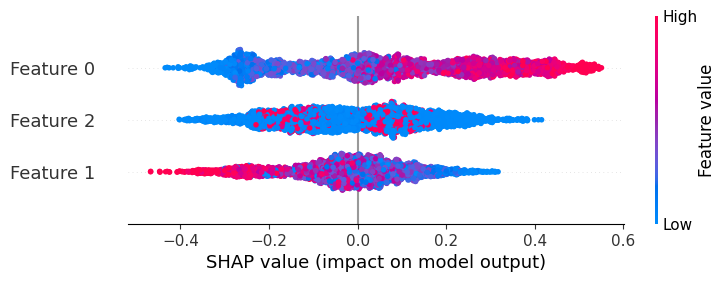

In [111]:
# Now you can create the beeswarm plot
shap.plots.beeswarm(shap_values)

#Plot Type:
Beeswarm plot.
#Purpose:
This plot shows the SHAP values for each feature and how they impact the model's predictions. Each dot represents a data instance.
The color of the dot indicates the feature value (red for high, blue for low).
The position on the horizontal axis shows the SHAP value, which represents the impact on the model's prediction. Dots further to the right increase the prediction (e.g., probability of being 'selected'), dots to the left decrease the prediction.
The vertical axis groups data points by feature.
The plot is automatically sorted by feature importance in descending order by default.
#Insights:
Feature Importance: The features with the widest spread of dots and the largest SHAP values (both positive and negative) are the most important for the model's predictions.
Feature Impact: The direction (left or right) and color of the dots tell you how a feature value influences the prediction.
Interactions: Clustering of dots might indicate interactions between features.
#Example:
If the 'Transcript_length' feature has a wide spread of dots, it's an important predictor. Red dots on the right side for this feature would mean longer transcripts are associated with higher predicted probabilities for the 'selected' class.

In [113]:
import numpy as np

# Get predicted probabilities for the 'selected' class (assuming class 1)
predictions = model.predict_proba(X_scaled)[:, 1]

# Define thresholds for low, medium, and high predictions
low_threshold = 0.3  # Adjust as needed
high_threshold = 0.7  # Adjust as needed

# Find indices of instances belonging to each category
low_indices = np.where(predictions < low_threshold)[0]
medium_indices = np.where((predictions >= low_threshold) & (predictions <= high_threshold))[0]
high_indices = np.where(predictions > high_threshold)[0]

# Print the number of instances in each category
print("Number of low prediction instances:", len(low_indices))
print("Number of medium prediction instances:", len(medium_indices))
print("Number of high prediction instances:", len(high_indices))

Number of low prediction instances: 1540
Number of medium prediction instances: 143
Number of high prediction instances: 1491


In [114]:
# Print the indices for each category
print("Low prediction indices:", low_indices)
print("Medium prediction indices:", medium_indices)
print("High prediction indices:", high_indices)

Low prediction indices: [   0    2    4 ... 3170 3172 3173]
Medium prediction indices: [ 184  420  438  452  504  514  522  528  533  550  551  575  581  596
  597  610  614  651  654  657  661  667  681  683  684  757  767  778
  783  784  785  810  814  815  817  818  825  829  842  873  875  879
  883  971 1098 1102 1103 1115 1117 1136 1185 1204 1220 1241 1273 1274
 1278 1285 1294 1304 1305 1318 1321 1325 1330 1338 1386 1424 1443 1480
 1481 1497 1513 1516 1549 1573 1590 1600 1601 1614 1615 1625 1659 1674
 1676 1682 1684 1693 1698 1705 1707 1743 1744 1750 1758 1777 1778 1783
 1793 1802 1812 1814 1820 1833 1849 1853 1879 1881 1895 1909 1919 1932
 1954 2013 2017 2045 2146 2321 2348 2370 2375 2430 2454 2663 2668 2680
 2712 2729 2788 2913 2998 3008 3020 3025 3034 3036 3051 3066 3080 3099
 3111 3120 3133]
High prediction indices: [   1    3    6 ... 3167 3169 3171]


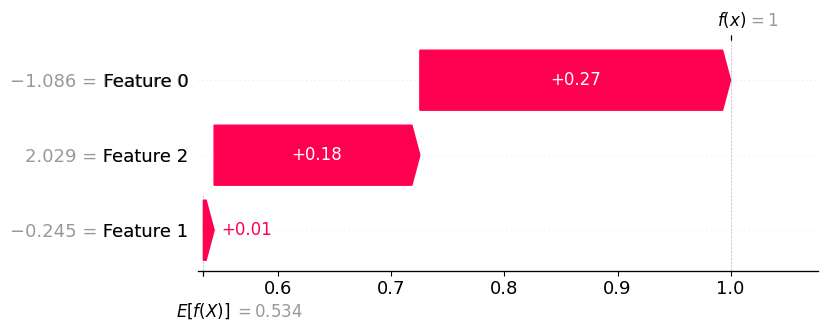

In [121]:
# Waterfall plot for a low prediction
shap.plots.waterfall(shap_values[0])  # Replace 0 with the index of a low prediction instance

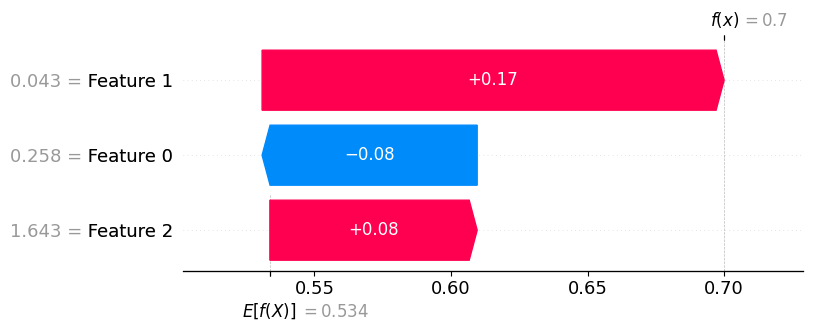

In [122]:
# Waterfall plot for a medium prediction
shap.plots.waterfall(shap_values[184])  # Replace 5 with the index of a medium prediction instance

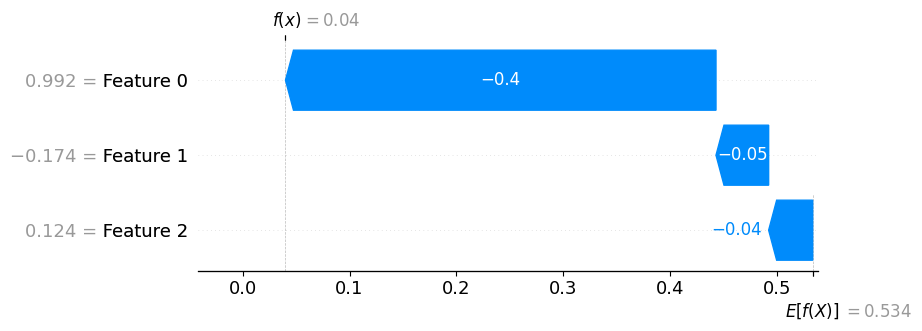

In [120]:
# Waterfall plot for a high prediction
shap.plots.waterfall(shap_values[1]) # Replace 10 with the index of a high prediction instance

#Plot Type:
 Waterfall plot.
#Purpose:
This plot provides a detailed breakdown of how SHAP values contribute to the model's prediction for a single instance (specified by the index).
The starting point (usually E[f(x)]) is the average model prediction.
Each bar represents a feature, with its length proportional to the SHAP value.
Red bars increase the prediction; blue bars decrease it.
#Insights:
Prediction Explanation: The plot helps understand why a specific instance received a particular prediction.
Feature Contributions: You can see which features had the biggest positive and negative impact on the prediction for this specific instance.
#Example:
A waterfall plot for a specific instance might show that a low 'Resume_length' had a large negative impact, leading to a lower predicted probability of being 'selected.'

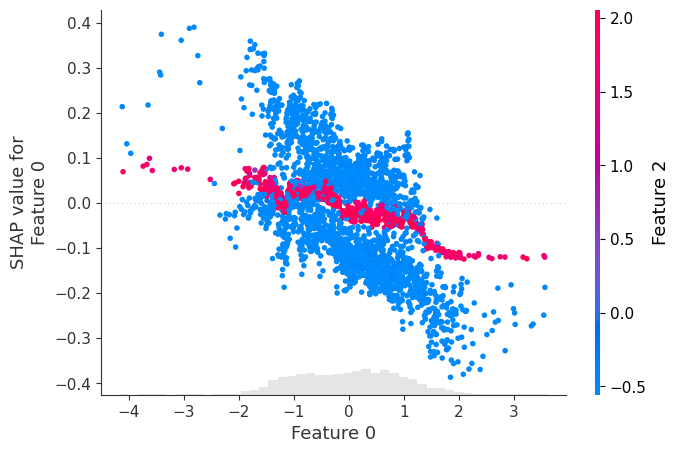

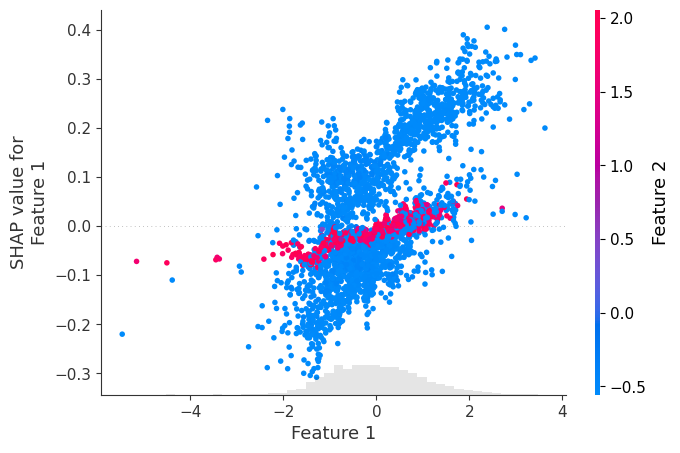

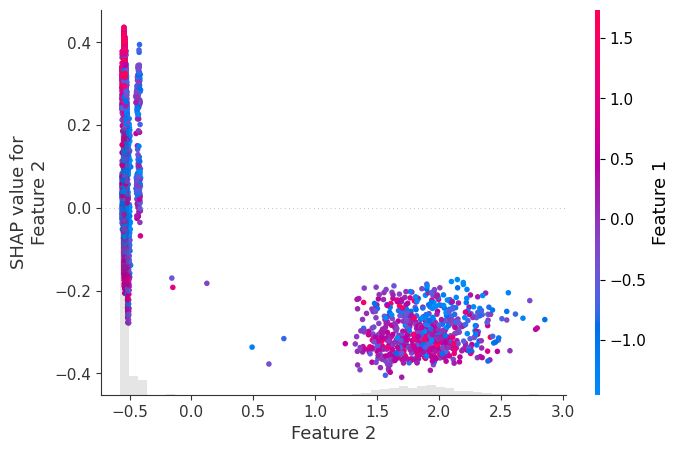

In [90]:
# Get feature names from the original data
feature_names = ['Transcript_length', 'Resume_length', 'Job_Description_length']

# Assuming shap_values.values is a NumPy array or a list of arrays
for i, feature in enumerate(feature_names):
    shap.plots.scatter(shap_values[:, i], color=shap_values) # Use the index 'i' instead of the feature name

#Plot Type:
 Scatter plot.
#Purpose:
Shows the relationship between a feature's value and its SHAP value.
Each dot represents a data point.
The x-axis is the feature value.
The y-axis is the SHAP value for that feature.
The color of the dot represents the value of another feature (indicated by color=shap_values).
#Insights:
Feature Impact: The slope and direction of the relationship tell you how the feature impacts the prediction.
Interactions: Color variations can reveal interactions, showing how the impact of one feature changes based on the value of another feature.
#Example:
A scatter plot for 'Transcript_length' might show a positive slope, indicating that longer transcripts are associated with higher predictions. Color variations could reveal that this relationship is stronger when 'Resume_length' is also high.

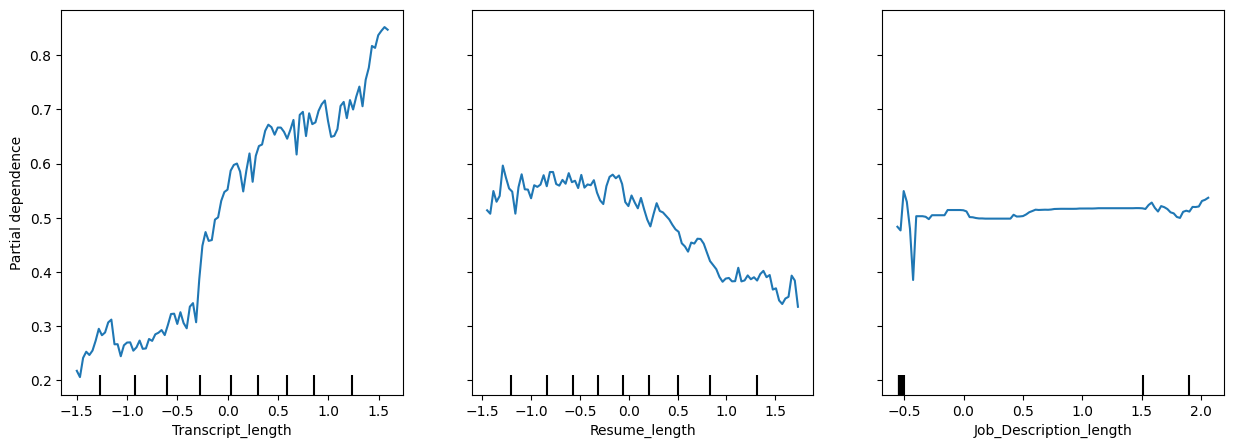

In [126]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Get feature names from the original data (before scaling)
feature_names = ['Transcript_length', 'Resume_length', 'Job_Description_length']

# 1D Partial Dependence Plots
fig, ax = plt.subplots(figsize=(15, 5))
PartialDependenceDisplay.from_estimator(
    model,
    X_scaled,  # Pass the scaled data
    features=[0, 1, 2],  # Refer to features by their index in X_scaled
    feature_names=feature_names,  # Provide the original feature names for labeling
    ax=ax
)
plt.show()

#Plot Type:
 1D Partial Dependence Plot.

#Purpose:
 This plot shows the relationship between a single feature and the model's prediction, while holding other features constant. It visualizes the marginal effect of a feature on the predicted outcome.

#Insights:

Feature Effect: Observe the trend of the line to understand how changing the feature value affects the prediction. An upward trend indicates a positive relationship (increasing the feature value increases the prediction), while a downward trend indicates a negative relationship.
Feature Importance: Features with steeper slopes generally have a stronger influence on the model's prediction. Flat lines suggest that the feature has little impact in that range of values.
Non-linearity: Curves or non-linear shapes in the line indicate that the feature's effect is not simply additive, and its impact changes depending on its value.
#Example:
 If the line for 'Transcript_length' shows an upward trend, it suggests that longer transcripts are associated with a higher probability of being 'selected', all else being equal. A steeper slope would imply a stronger impact.

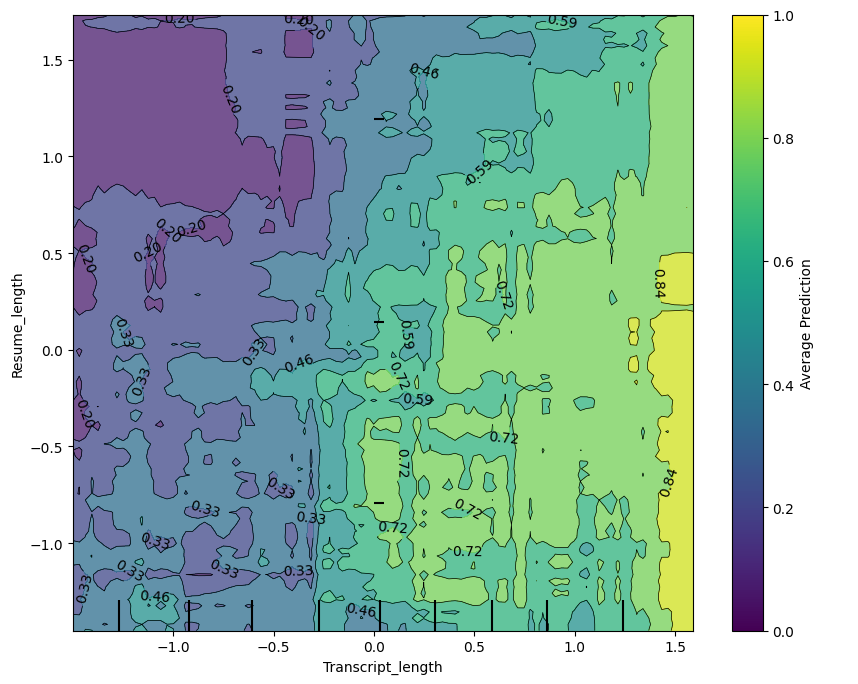

In [129]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Get feature names from the original data (before scaling)
feature_names = ['Transcript_length', 'Resume_length', 'Job_Description_length']

# 2D Partial Dependence Plot
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed

# Assuming 'Transcript_length' (index 0) and 'Resume_length' (index 1) are the top 2 features
display = PartialDependenceDisplay.from_estimator(
    model,
    X_scaled,
    features=[(0, 1)],  # Specify the indices of the two features for interaction
    feature_names=feature_names,  # Provide original feature names for labeling
    kind='average',  # Use 'average' for the 2D PDP
    contour_kw={'cmap': 'viridis'},  # Customize contour plot colors
    ax=ax,
)

plt.colorbar(display.deciles_vlines_[0][0], label='Average Prediction')  # Add a colorbar, referencing the PDP
plt.show()

#Plot Type:
2D Partial Dependence Plot.

#Purpose:
This plot visualizes the interaction effect of two features on the model's prediction. It shows how the relationship between one feature and the prediction changes depending on the value of another feature.

#Insights:

Interaction Effects: Look for areas of different colors or contour lines that are not parallel to the axes. This indicates an interaction effect, where the impact of one feature depends on the value of the other.
Feature Importance: Regions with denser contour lines or larger color gradients indicate areas where the interaction effect is stronger.
Non-linear Interactions: Curved or complex contour patterns suggest a non-linear interaction between the features.
#Example:
In the 2D PDP for 'Transcript_length' and 'Resume_length', if the contour lines are closer together in the area where both features have high values, it suggests that the positive impact of a longer transcript is even stronger when the resume length is also longer, indicating an interaction between these two features.

# Overall Feature Importance

Transcript Length and Resume Length appear to be the most important features influencing the model's predictions for whether a candidate is selected or rejected. They have the widest spread of SHAP values in the beeswarm plot and the steepest slopes in the 1D Partial Dependence Plots (PDP).
Job Description Length has a relatively smaller impact compared to the other two features.
# Specific Feature Impacts

Transcript Length: Longer transcripts generally lead to a higher probability of being selected (positive SHAP values, upward trend in PDP).
Resume Length: Longer resumes are generally associated with a higher probability of being selected (positive SHAP values, upward trend in PDP), but the impact might be less pronounced than transcript length.
Job Description Length: The relationship is less clear-cut. There might be an optimal range for job description length where the chances of selection are higher, and very long or very short descriptions might have a negative impact (non-linearity in PDP).
# Interactions

The scatter plots and 2D PDP suggest a potential interaction between Transcript Length and Resume Length. The impact of a longer transcript might be amplified when the resume length is also longer.
There could be other interactions, but they are not as clearly visible in the visualizations.
# Additional Insights from Waterfall Plots

Waterfall plots provide instance-specific explanations. You looked at examples of low, medium, and high prediction instances.
You can see how individual features contributed to those predictions, highlighting the key factors driving the model's decisions.
# In essence

The model indicates that candidates with longer transcripts and resumes have a higher likelihood of being selected. The job description length might play a role, but its relationship is more complex. Additionally, there's evidence of an interaction effect between transcript and resume length.